# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association (such as correlation between numerical variables) between two categorical variables. There are more columns for feature engineering, but we will focus on the name column and filling missing values in other columns.

To illustrate the concept, we will use the "titanic" dataset. This is a well explored dataset but provides a lot of opportunities for feature engineering. Our task is predicting the survival of a passenger, but we will not build a model in this homework.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import re
%matplotlib inline
sns.set(style="darkgrid")
from sklearn.preprocessing import LabelEncoder

In [2]:

titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [3]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin (687/891). We can't drop records based on cabin. We will encode not having a cabin as character **O**

# Q1 (.5 points) Fill NAN in cabin with Character 'O'

In [6]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('O') 

In [7]:
titanic_df.Cabin.head(12)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter (C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [8]:
titanic_df['Cabin_type'] = titanic_df['Cabin'].apply(lambda x: x[0].upper())

In [9]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

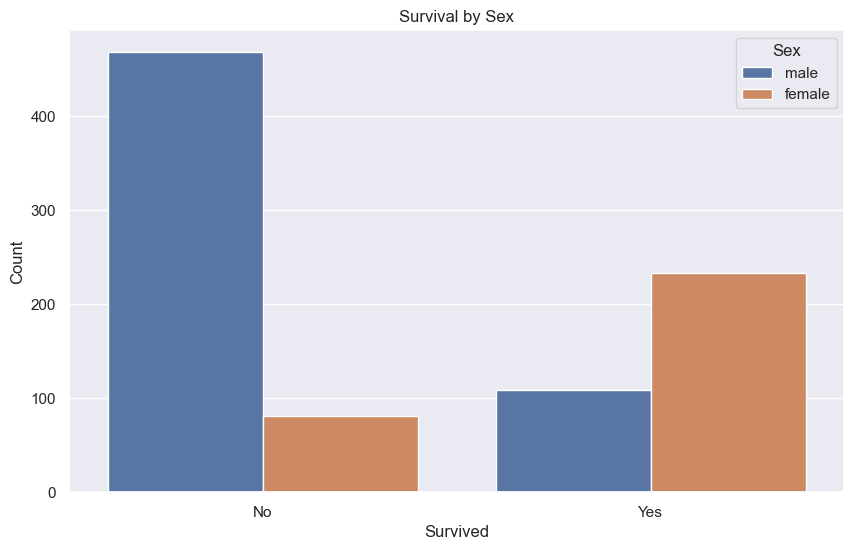

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=titanic_df, hue="Sex")
plt.title("Survival by Sex")
plt.xticks([0,1],["No", "Yes"])
plt.ylabel("Count")
plt.show()

# Q4(.5) What is your observation from this plot.

#### It is pretty clear that male passengers died at a much higher rate than female passengers in this incident.
 There are roughly(estimate based on looking at the graph) 580 male passangers and 320 female passanger, and about 110 males survived and 230 females survived. 




We can't use name as a feature for building any machine learning classifier (logistic regression). Let's look at Name column and see if we can think of a better feature for name.

In [11]:
titanic_df['Name'].sample(30)

260                                    Smith, Mr. Thomas
58                          West, Miss. Constance Mirium
416      Drew, Mrs. James Vivian (Lulu Thorne Christian)
18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
291              Bishop, Mrs. Dickinson H (Helen Walton)
220                       Sunderland, Mr. Victor Francis
60                                 Sirayanian, Mr. Orsen
67                              Crease, Mr. Ernest James
842                              Serepeca, Miss. Augusta
196                                  Mernagh, Mr. Robert
110                       Porter, Mr. Walter Chamberlain
613                                     Horgan, Mr. John
391                               Jansson, Mr. Carl Olof
170                            Van der hoef, Mr. Wyckoff
123                                  Webber, Miss. Susan
195                                 Lurette, Miss. Elise
423    Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...
443                            

# Q5.(.5 points) Can you suggest a feature based on *Name* column. 

We could extract the surname/lastname and use that instead of the full name. Or as the next chunck suggests we could use the title.


# Q6(.5 points) Create a new feature named *Title* from the *Name* column.

Hint: Here are different titles

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different titles meant that time.

In [12]:
def get_title(name):
    titles = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.', 'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess', 'Jonkheer.']
    for title in titles:
        if title in name.split(" "):
            return title
    return np.nan

titanic_df["Title"] = titanic_df["Name"].apply(get_title)
titanic_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,O,Q,O,Mr.
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,O,S,O,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.


# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plots for males and for females.

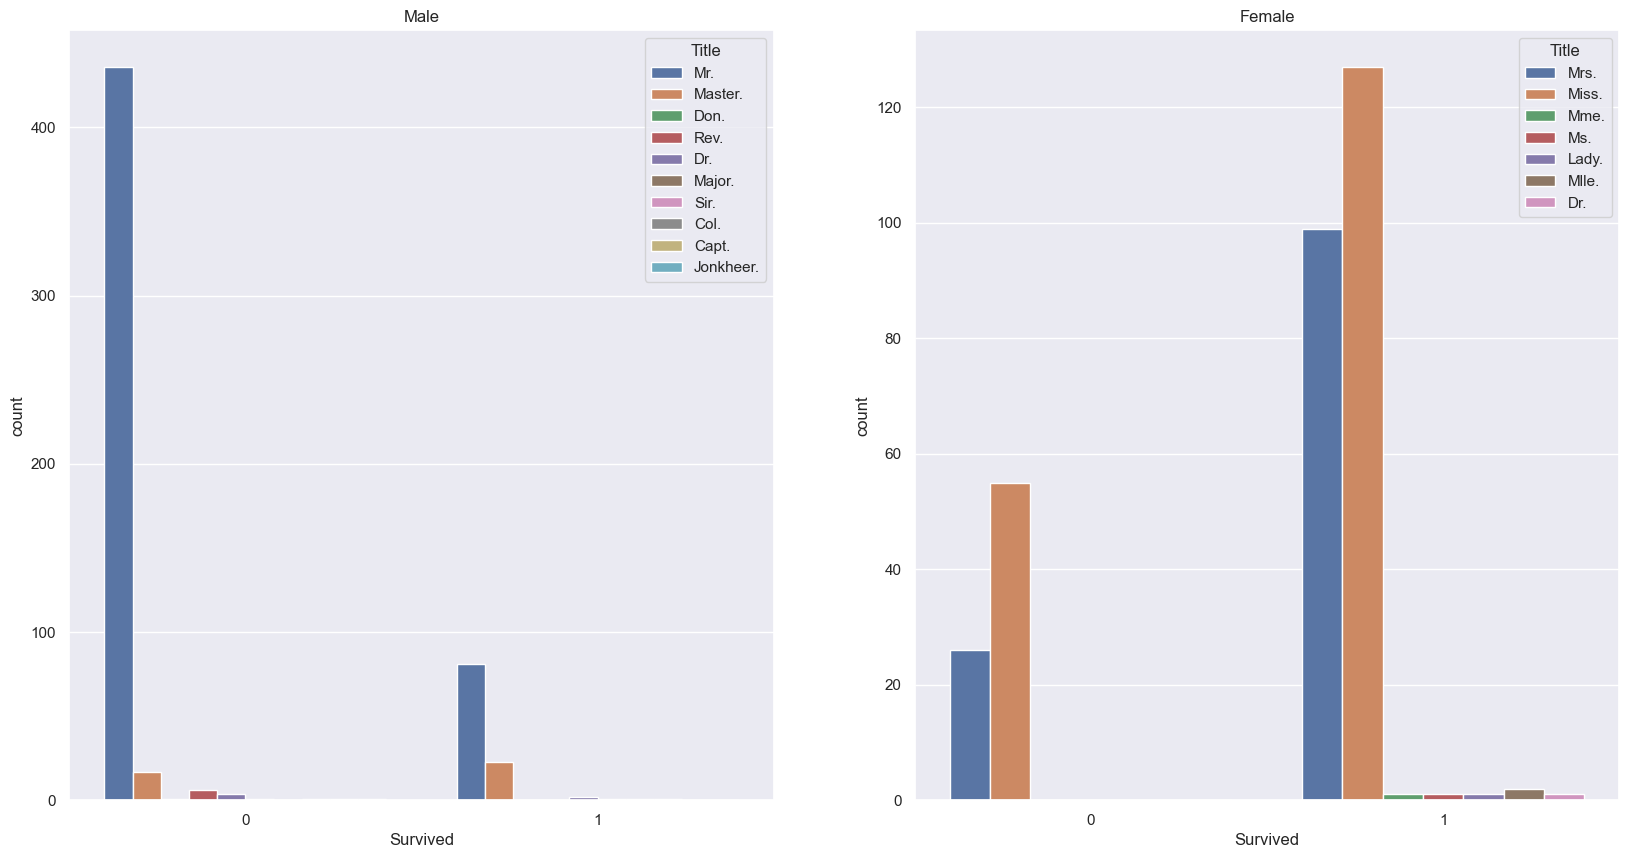

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(ax = axes[0], x='Survived', data=titanic_df[titanic_df["Sex"]=="male"], hue="Title")
axes[0].set_title("Male")

sns.countplot(ax = axes[1], x='Survived', data=titanic_df[titanic_df["Sex"]=="female"], hue="Title")
axes[1].set_title("Female")
plt.show()

# Q 8(.5 points) What is your observation from these plots?

It's interesting that all(going off the plot) of the reverends died, they stayed behind with the people. All of the women with strange titles survived.

Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age NaN value by the mean for each **Title** group.

In [14]:
title_mean_age = titanic_df.groupby('Title')["Age"].mean()
titanic_df["Age"] = titanic_df['Age'].fillna(titanic_df["Title"].map(title_mean_age))
titanic_df['Age'].sample(8)

716    38.00000
433    17.00000
570    62.00000
774    54.00000
691     4.00000
389    17.00000
507    32.36809
718    32.36809
Name: Age, dtype: float64

In [15]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_type     0
Title          1
dtype: int64

There are two records with a missing Embarked value.

In [16]:
# Let's drop these two records
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [17]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [18]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [19]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [20]:

titanic_clean_df = pd.get_dummies(titanic_clean_df, columns=['Title'], prefix='Title')
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns=['Cabin_type'], prefix='Cabin_type')

#Embarked is type object I can turn this into dummies aswell
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns=['Embarked'], prefix='Embarked')

In [21]:
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Capt.,Title_Col.,Title_Don.,...,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_O,Cabin_type_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [22]:
titanic_clean_df.dtypes

Survived             int64
Pclass               int64
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Title_Capt.           bool
Title_Col.            bool
Title_Don.            bool
Title_Dr.             bool
Title_Jonkheer.       bool
Title_Lady.           bool
Title_Major.          bool
Title_Master.         bool
Title_Miss.           bool
Title_Mlle.           bool
Title_Mme.            bool
Title_Mr.             bool
Title_Mrs.            bool
Title_Ms.             bool
Title_Rev.            bool
Title_Sir.            bool
Cabin_type_A          bool
Cabin_type_B          bool
Cabin_type_C          bool
Cabin_type_D          bool
Cabin_type_E          bool
Cabin_type_F          bool
Cabin_type_G          bool
Cabin_type_O          bool
Cabin_type_T          bool
Embarked_C            bool
Embarked_Q            bool
Embarked_S            bool
dtype: object

# Q11.(.5) Plot a heatmap of correlation using titanic_df.

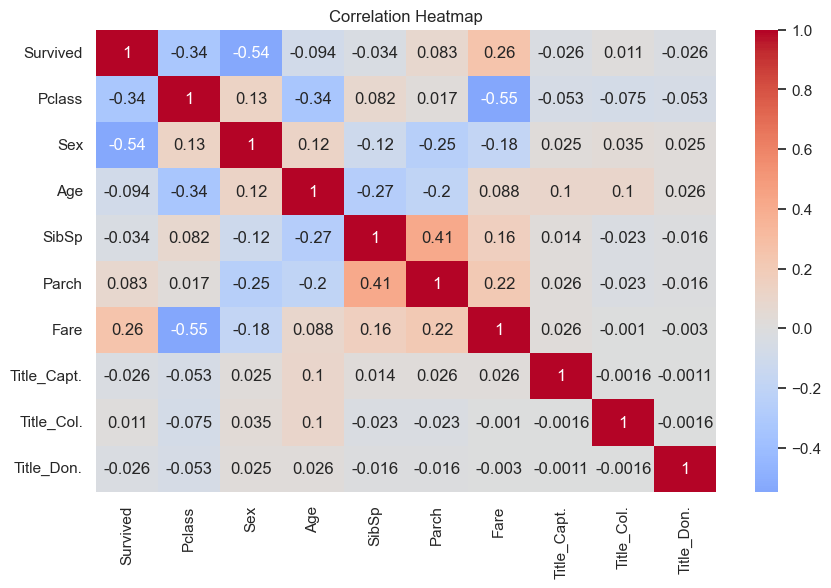

In [23]:
# There are a ton of variables now that weve dummy coded so lets look at a selection of them
corr_df = titanic_clean_df.iloc[:,:10]
correlation_matrix = corr_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


# Q 12.(.5) What are your observations from this heatmap.

We can see a few interesting correlations form the selection we made above.
There are a few strong correlations sex/survived and fare/survived, age/class, class/survived.

 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not be a linear relationship between variables (Survived vs any other attributes).

For categorical variables, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of the Pearson’s Chi-Square Test.

Let us use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let us copy and paste this here:

In [24]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let us work with  titanic dataset again.


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select records with Title value = *Master., Miss., Mr. or Mrs.*  into titanic_df_small.

You can check that other titles do not have enough records, hence we will ignore them in our analysis.

In [25]:
titles = ["Master.", "Miss.", "Mr.", "Mrs."]
titanic_df_small = titanic_df[titanic_df['Title'].isin(titles)]
titanic_df_small.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
662,663,0,1,"Colley, Mr. Edward Pomeroy",1,47.0,0,0,5727,25.5875,E58,S,E,Mr.
346,347,1,2,"Smith, Miss. Marion Elsie",0,40.0,0,0,31418,13.0000,O,S,O,Miss.
452,453,0,1,"Foreman, Mr. Benjamin Laventall",1,30.0,0,0,113051,27.7500,C111,C,C,Mr.


# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [26]:
cross_tab = pd.crosstab(titanic_df_small['Survived'],titanic_df_small['Title'])
cross_tab

Title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0,17,55,436,26
1,23,126,81,98


In [27]:
cramers_v(cross_tab.to_numpy())

0.56837187121439

# Q 15 (.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [28]:
le = LabelEncoder()
titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])
titanic_df_small.head()

/var/folders/q0/rm2w_k594fx0w2480vcbn59w0000gn/T/ipykernel_77531/569325268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title,Encoded_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,Mrs.,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,O,Mr.,2


# Q 16 (.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [29]:
titanic_df_small['Survived'].corr(titanic_df_small['Encoded_title'])

-0.07287583211561176

# Q 17. (.5 points) What is your observation comparing the use of cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

The encoded title is slightly negative (-0.07) saying that title is not very correlated to survival. While cramers v is 0.56 showing the title is positively correlated to survival.